##### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

###### First, we import our libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### Inspecting the data

###### Let's load our data.

In [2]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\GitHub\DataFest-Challenges\DataFest Africa code review\Q1\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


###### Getting a bit more info about our data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


* The data has 7 fields.
* The data has 5000 observations.
* There are no null values in the data.

###### Let's get a summary of the data

In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


* The mean order_amount is 3145.13 which is the same as is given in the problem

##### 1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


###### Looking at the data summary above, we can sort of conclude that there is a huge variation in the order amount. This would most likely skew the MEAN. 
###### Let us look at the AOV store-by-store.

In [24]:
grouped = df.groupby(["shop_id"])["order_amount"].mean().sort_values(ascending = False).head(10)

grouped

shop_id
42    235101.490196
78     49213.043478
50       403.545455
90       403.224490
38       390.857143
81       384.000000
6        383.508475
89       379.147541
33       376.275000
51       361.804348
Name: order_amount, dtype: float64

###### we can see that store 42 and store 78 have some extreme AOV values. We can visualize this to consider stores 42 and 78 as outlier.

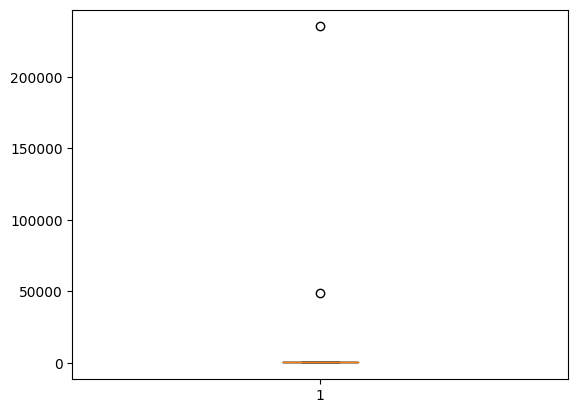

In [27]:
plt.boxplot(x=grouped)

plt.show()

###### We can clearly see the gap in AOV of stores 42 and 78 in comparison to the rest of the stores.

######  There is an outlier of around $230,000 and $49,000 for stores 42 & 78 which would have most definitely skewed our mean.
###### What went wrong witht the naive computation of AOV was that it did not take into account the effect of Outliers

##### *b. What metric would you report for this dataset?*

###### *To avoid the bias in AOV which the extremely high total_order values introduces, a better measure would be to use the median values (50th percentile).*

##### *c. What is the value of this metric?*

In [28]:
oa_median = df['order_amount'].median()

print(oa_median)

284.0
